# Import Libarary

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Read data

In [2]:
# Open the input and output files
with open('TstUoB_2024-01-02LOBs.txt', 'r') as infile, open('2024-01-02LOBs.csv', 'w', newline='') as outfile:
    # Create a CSV writer object
    writer = csv.writer(outfile)

    # Write the header row
    writer.writerow(['time', 'bid_weighted_average', 'ask_weighted_average','mid_price','bid_ask_ratio'])

    # Loop over each line in the input file
    for line in infile:
        # Split the line into its components
        components = eval(line)
        # Read the next line from the input file and evaluate it
        next_line = infile.readline()
        if not next_line:
            continue    
        else:
            next_components = eval(next_line)
        # check if bid and pay are same
            if components[2][1]==next_components[2][1] and components[3][1]==next_components[3][1]:
                continue    
            # check the number of components in bid and ask
            elif len(components[2][1]) < 1 or len(components[3][1]) < 1:
                continue
            else:
                time = components[1] 
                bid = round(sum(item[0]*item[1] for item in components[2][1])/sum(item[1] for item in components[2][1]),2)
                ask = round(sum(item[0]*item[1] for item in components[3][1])/sum(item[1] for item in components[3][1]),2)
                mid_price = round(np.average([max(item[0] for item in components[2][1]),min(item[0] for item in components[3][1])]),2)
                bid_ask_ratio = round(sum(item[1] for item in components[2][1])/sum(item[1] for item in components[3][1]),2)

        # Write the data to the output file
        writer.writerow([time, bid, ask, mid_price, bid_ask_ratio])
LOB02 = pd.read_csv('2024-01-02LOBs.csv')
LOB02.head()

,time,bid_weighted_average,ask_weighted_average,mid_price,bid_ask_ratio
0,2.232,43.29,284.67,164.0,1.17
1,3.162,57.57,284.67,173.5,1.17
2,4.216,63.29,284.67,174.0,1.17
3,4.774,63.57,284.67,174.5,1.17
4,4.836,63.86,284.67,175.0,1.17


In [3]:
# Open the input and output files
with open('TstUoB_2024-01-03LOBs.txt', 'r') as infile, open('2024-01-03LOBs.csv', 'w', newline='') as outfile:
    # Create a CSV writer object
    writer = csv.writer(outfile)

    # Write the header row
    writer.writerow(['time', 'bid_weighted_average', 'ask_weighted_average','mid_price','bid_ask_ratio'])

    # Loop over each line in the input file
    for line in infile:
        # Split the line into its components
        components = eval(line)
        # Read the next line from the input file and evaluate it
        next_line = infile.readline()
        if not next_line:
            continue    
        else:
            next_components = eval(next_line)
        # check if bid and pay are same
            if components[2][1]==next_components[2][1] and components[3][1]==next_components[3][1]:
                continue    
            # check the number of components in bid and ask
            elif len(components[2][1]) < 1 or len(components[3][1]) < 1:
                continue
            else:
                time = components[1] 
                bid = round(sum(item[0]*item[1] for item in components[2][1])/sum(item[1] for item in components[2][1]),2)
                ask = round(sum(item[0]*item[1] for item in components[3][1])/sum(item[1] for item in components[3][1]),2)
                mid_price = round(np.average([max(item[0] for item in components[2][1]),min(item[0] for item in components[3][1])]),2)
                bid_ask_ratio = round(sum(item[1] for item in components[2][1])/sum(item[1] for item in components[3][1]),2)

        # Write the data to the output file
        writer.writerow([time, bid, ask, mid_price, bid_ask_ratio])
LOB03 = pd.read_csv('2024-01-03LOBs.csv')
LOB03.head()

,time,bid_weighted_average,ask_weighted_average,mid_price,bid_ask_ratio
0,2.666,200.0,344.67,272.0,0.67
1,3.038,200.0,320.86,249.0,0.29
2,3.286,200.0,312.57,248.5,0.29
3,4.092,200.0,296.86,238.0,0.29
4,4.216,200.0,290.57,237.5,0.29


In [4]:
ohlc = pd.read_csv('./Tapes/ohlc.csv')
ohlc.head()

,Date,Open,High,Low,Close
0,2024-01-03,268,313,250,297
1,2024-01-04,298,344,289,314
2,2024-01-05,298,316,274,288
3,2024-01-08,294,295,231,250
4,2024-01-09,241,267,226,252


In [5]:
tape02 = pd.read_csv('TstUoB_2024-01-02tapes.csv')
names = ['Date', 'Name', 'Time', 'Price', 'Quantity']
tape02.columns = names

tape03 = pd.read_csv('TstUoB_2024-01-03tapes.csv')
names = ['Date', 'Name', 'Time', 'Price', 'Quantity']
tape03.columns = names

tape02.head()
tape03.head()

,Date,Name,Time,Price,Quantity
0,TstUoB_2024-01-03,Exch0Lit,7.905,264,2
1,TstUoB_2024-01-03,Exch0Lit,8.370,265,2
2,TstUoB_2024-01-03,Exch0Lit,9.765,270,1
3,TstUoB_2024-01-03,Exch0Lit,9.765,266,1
4,TstUoB_2024-01-03,Exch0Lit,11.377,265,1


# Data visualization

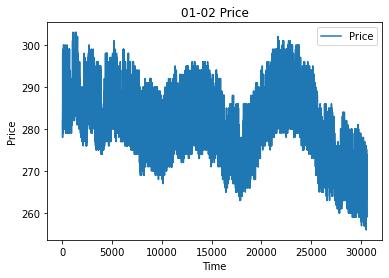

In [6]:
# 01-02 Price
plt.plot(tape02.Time, tape02.Price) 
plt.title('01-02 Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(['Price']) 
plt.show()

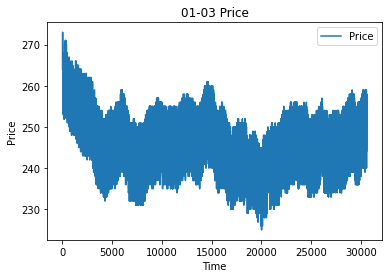

In [7]:
# 01-03 Price
plt.plot(tape03.Time, tape03.Price) 
plt.title('01-03 Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(['Price']) 
plt.show()

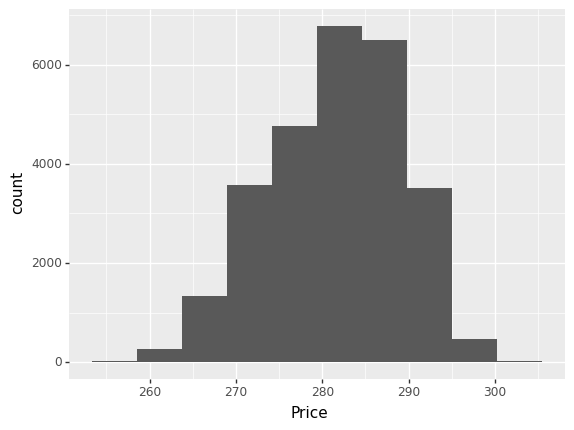

<ggplot: (8789099230190)>

In [8]:
from plotnine import ggplot, aes, stat_bin, geom_bar

ggplot(tape02) + aes(x = "Price") + stat_bin(bins=10) + geom_bar()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

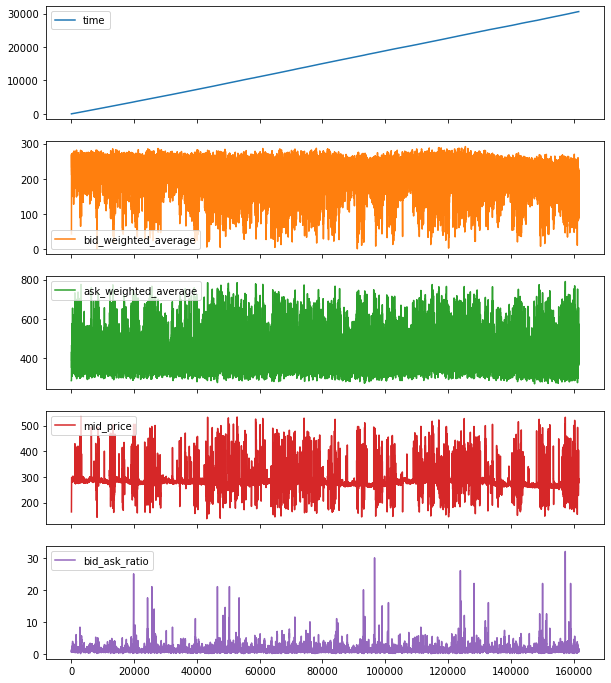

In [9]:
#LOB02 features plot
LOB02.plot(subplots=True,figsize=(10, 12))

In [10]:
# OHLC Candlestick Chart
fig = go.Figure(data=[go.Candlestick(x=ohlc['Date'],
                open=ohlc['Open'],
                high=ohlc['High'],
                low=ohlc['Low'],
                close=ohlc['Close'])])

fig.show()

# Add New Column
## Judging the daily trend (Rising, Falling, Stable)

In [11]:
# create new column vectors for categories
ohlc['Trend'] = 0
ohlc['rising'] = 0
ohlc['falling'] = 0
ohlc['stable'] = 0

# create new column for price changes
ohlc['price_change'] = 0
for i in range(1,np.shape(ohlc)[0]):
    ohlc.loc[i,'price_change'] = ((ohlc.iloc[i,4] - ohlc.iloc[i-1,4]) / ohlc.iloc[i-1,4]) * 100

ohlc.describe()

,Open,High,Low,Close,Trend,rising,falling,stable,price_change
count,124.000000,124.000000,124.000000,124.000000,124.0,124.0,124.0,124.0,124.000000
mean,165.427419,178.516129,147.403226,165.838710,0.0,0.0,0.0,0.0,-0.597611
std,58.140029,63.462105,53.318177,57.209412,0.0,0.0,0.0,0.0,6.651130
min,90.000000,109.000000,90.000000,100.000000,0.0,0.0,0.0,0.0,-19.444444
25%,112.750000,120.500000,97.750000,114.750000,0.0,0.0,0.0,0.0,-5.023982
50%,143.500000,151.000000,124.000000,141.500000,0.0,0.0,0.0,0.0,-0.651738
75%,211.000000,221.000000,184.000000,204.250000,0.0,0.0,0.0,0.0,3.818681
max,298.000000,344.000000,289.000000,314.000000,0.0,0.0,0.0,0.0,16.826923


In [12]:
# define a fluctuation percentage
fluc_percentage = 0

# loop for seaching the appropriate percentage value
for x in np.arange(2.5,3.5,0.05):
    fluc_percentage = x
    rising_count = falling_count = stable_count = 0
    for i in range(0,np.shape(ohlc)[0]):
        if ohlc.loc[i,'price_change'] > x:
            rising_count+=1
        elif ohlc.loc[i,'price_change'] < -x:
            falling_count+=1
        else:
            stable_count+=1
    total_count = rising_count+falling_count+stable_count
    rising_percentage = (rising_count / total_count) * 100
    falling_percentage = (falling_count / total_count) * 100
    stable_percentage = (stable_count / total_count) * 100
    
    print('fluc percentage is:\n', fluc_percentage)
    print(f"Percentage of rising: {rising_percentage:.2f}%")
    print(f"Percentage of falling: {falling_percentage:.2f}%")
    print(f"Percentage of stable: {stable_percentage:.2f}%")

fluc percentage is:
 2.5
Percentage of rising: 33.06%
Percentage of falling: 39.52%
Percentage of stable: 27.42%
fluc percentage is:
 2.55
Percentage of rising: 33.06%
Percentage of falling: 39.52%
Percentage of stable: 27.42%
fluc percentage is:
 2.5999999999999996
Percentage of rising: 33.06%
Percentage of falling: 38.71%
Percentage of stable: 28.23%
fluc percentage is:
 2.6499999999999995
Percentage of rising: 33.06%
Percentage of falling: 38.71%
Percentage of stable: 28.23%
fluc percentage is:
 2.6999999999999993
Percentage of rising: 33.06%
Percentage of falling: 37.90%
Percentage of stable: 29.03%
fluc percentage is:
 2.749999999999999
Percentage of rising: 33.06%
Percentage of falling: 37.90%
Percentage of stable: 29.03%
fluc percentage is:
 2.799999999999999
Percentage of rising: 33.06%
Percentage of falling: 37.90%
Percentage of stable: 29.03%
fluc percentage is:
 2.8499999999999988
Percentage of rising: 32.26%
Percentage of falling: 37.90%
Percentage of stable: 29.84%
fluc pe

In [13]:
# Choose the x value that makes the three categories most evenly distributed
fluc_percentage = 3

for i in range(0,np.shape(ohlc)[0]):
    if ohlc.loc[i,'price_change'] > fluc_percentage:
        ohlc.loc[i,'Trend'] = 1
    elif ohlc.loc[i,'price_change'] < -fluc_percentage:
        ohlc.loc[i,'Trend'] = -1
    else:
        ohlc.loc[i,'Trend'] = 0
ohlc.drop(['rising', 'falling', 'stable'], axis = 1, inplace=True)
ohlc

,Date,Open,High,Low,Close,Trend,price_change
0,2024-01-03,268,313,250,297,0,0.000000
1,2024-01-04,298,344,289,314,1,5.723906
2,2024-01-05,298,316,274,288,-1,-8.280255
3,2024-01-08,294,295,231,250,-1,-13.194444
4,2024-01-09,241,267,226,252,0,0.800000
...,...,...,...,...,...,...,...
119,2024-06-24,90,109,90,108,0,0.934579
120,2024-06-25,105,110,90,103,-1,-4.629630
121,2024-06-26,105,110,90,106,0,2.912621
122,2024-06-27,102,109,90,107,0,0.943396


# Moving Averages

In [14]:
# Features EMA-9, SMA-5, SMA-10, SMA-15, SMA-30
ohlc['EMA_9'] = ohlc['Close'].ewm(9).mean().shift()
ohlc['SMA_5'] = ohlc['Close'].rolling(5).mean().shift()
ohlc['SMA_10'] = ohlc['Close'].rolling(10).mean().shift()
ohlc['SMA_15'] = ohlc['Close'].rolling(15).mean().shift()
ohlc['SMA_30'] = ohlc['Close'].rolling(30).mean().shift()


In [15]:
# Plot features chart
fig = go.Figure()
fig.add_trace(go.Scatter(x=ohlc.Date, y=ohlc.EMA_9, name='EMA-9'))
fig.add_trace(go.Scatter(x=ohlc.Date, y=ohlc.SMA_5, name='SMA-5'))
fig.add_trace(go.Scatter(x=ohlc.Date, y=ohlc.SMA_10, name='SMA-10'))
fig.add_trace(go.Scatter(x=ohlc.Date, y=ohlc.SMA_15, name='SMA-15'))
fig.add_trace(go.Scatter(x=ohlc.Date, y=ohlc.SMA_30, name='SMA-30'))
fig.add_trace(go.Scatter(x=ohlc.Date, y=ohlc.Close, name='Close', opacity=0.2))
fig.show()

# MACD

In [16]:
# Get MACD features
EMA_3 = pd.Series(ohlc['Close'].ewm(span=3, min_periods=3).mean())
EMA_6 = pd.Series(ohlc['Close'].ewm(span=6, min_periods=6).mean())
ohlc['MACD'] = pd.Series(EMA_3 - EMA_6)
ohlc['MACD_signal'] = pd.Series(ohlc.MACD.ewm(span=9, min_periods=9).mean())


In [17]:
# Plot MACD
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=ohlc.Date, y=EMA_3, name='EMA 3'), row=1, col=1)
fig.add_trace(go.Scatter(x=ohlc.Date, y=EMA_6, name='EMA 6'), row=1, col=1)
fig.add_trace(go.Scatter(x=ohlc.Date, y=ohlc.Close, name='Close'), row=1, col=1)
fig.add_trace(go.Scatter(x=ohlc.Date, y=ohlc['MACD'], name='MACD'), row=2, col=1)
fig.add_trace(go.Scatter(x=ohlc.Date, y=ohlc['MACD_signal'], name='Signal line'), row=2, col=1)
fig.show()

# Split data

In [18]:
# Check NaN Value
ohlc.isna()

,Date,Open,High,Low,Close,Trend,price_change,EMA_9,SMA_5,SMA_10,SMA_15,SMA_30,MACD,MACD_signal
0,False,False,False,False,False,False,False,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,False,False,False,False,False,False,False,False,False,False,False,False,False,False
120,False,False,False,False,False,False,False,False,False,False,False,False,False,False
121,False,False,False,False,False,False,False,False,False,False,False,False,False,False
122,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
ohlc.head(40)

,Date,Open,High,Low,Close,Trend,price_change,EMA_9,SMA_5,SMA_10,SMA_15,SMA_30,MACD,MACD_signal
0,2024-01-03,268,313,250,297,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-01-04,298,344,289,314,1,5.723906,297.000000,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-01-05,298,316,274,288,-1,-8.280255,305.947368,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-01-08,294,295,231,250,-1,-13.194444,299.324723,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-01-09,241,267,226,252,0,0.800000,284.981972,NaN,NaN,NaN,NaN,NaN,NaN
5,2024-01-10,247,290,237,277,1,9.920635,276.927963,280.2,NaN,NaN,NaN,-2.884487,NaN
6,2024-01-11,278,292,252,268,-1,-3.249097,276.943337,276.2,NaN,NaN,NaN,-2.239952,NaN
7,2024-01-12,271,275,223,237,-1,-11.567164,275.229079,267.0,NaN,NaN,NaN,-7.750292,NaN
8,2024-01-15,226,277,218,263,1,10.970464,268.516721,256.8,NaN,NaN,NaN,-3.373466,NaN
9,2024-01-16,275,278,241,271,1,3.041825,267.616149,259.4,NaN,NaN,NaN,0.303571,NaN


In [20]:
# Drop NaN value
ohlc = ohlc.iloc[30:]
ohlc.index = range(len(ohlc))
ohlc.head()

,Date,Open,High,Low,Close,Trend,price_change,EMA_9,SMA_5,SMA_10,SMA_15,SMA_30,MACD,MACD_signal
0,2024-02-14,248,253,190,203,-1,-19.444444,235.323840,220.2,229.5,234.600000,249.433333,-1.835696,-2.192180
1,2024-02-15,204,213,180,202,0,-0.492611,231.963242,220.8,222.4,231.466667,246.300000,-5.293905,-2.814028
2,2024-02-16,210,211,169,186,-1,-7.920792,228.860376,221.6,217.1,228.866667,242.566667,-9.201209,-4.093940
3,2024-02-19,187,202,172,195,1,4.838710,224.437662,217.2,210.6,224.533333,239.166667,-7.353671,-4.746897
4,2024-02-20,191,204,176,190,0,-2.564103,221.409679,207.6,208.9,222.133333,237.333333,-6.714729,-5.140951


In [21]:
# Split data to Trianing(60%), Validation(20%), Test(20%)
test_size  = 0.2
valid_size = 0.2

test_split_idx  = int(ohlc.shape[0] * (1-test_size))
valid_split_idx = int(ohlc.shape[0] * (1-(valid_size+test_size)))

train_df = ohlc.loc[: valid_split_idx].copy()
valid_df = ohlc.loc[valid_split_idx+1 : test_split_idx].copy()
test_df  = ohlc.loc[test_split_idx+1:].copy()

In [22]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train_df.Date, y=train_df.Close, name='Training'))
fig.add_trace(go.Scatter(x=valid_df.Date, y=valid_df.Close, name='Validation'))
fig.add_trace(go.Scatter(x=test_df.Date,  y=test_df.Close,  name='Test'))
fig.show()

# Predict Price

In [23]:
# Drop the unuseful columns
drop_cols = ['Date', 'Open', 'Low', 'High']
train_df = train_df.drop(drop_cols, 1)
valid_df = valid_df.drop(drop_cols, 1)
test_df  = test_df.drop(drop_cols, 1)

/var/folders/2p/hbrrydxn1fs88ry4qpd044y00000gn/T/ipykernel_29221/1726262770.py:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

/var/folders/2p/hbrrydxn1fs88ry4qpd044y00000gn/T/ipykernel_29221/1726262770.py:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

/var/folders/2p/hbrrydxn1fs88ry4qpd044y00000gn/T/ipykernel_29221/1726262770.py:5: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [24]:
# Split features and labels
y_train = train_df['Close'].copy()
X_train = train_df.drop(['Close'], 1)

y_valid = valid_df['Close'].copy()
X_valid = valid_df.drop(['Close'], 1)

y_test  = test_df['Close'].copy()
X_test  = test_df.drop(['Close'], 1)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Trend         57 non-null     int64  
 1   price_change  57 non-null     float64
 2   EMA_9         57 non-null     float64
 3   SMA_5         57 non-null     float64
 4   SMA_10        57 non-null     float64
 5   SMA_15        57 non-null     float64
 6   SMA_30        57 non-null     float64
 7   MACD          57 non-null     float64
 8   MACD_signal   57 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 4.1 KB


/var/folders/2p/hbrrydxn1fs88ry4qpd044y00000gn/T/ipykernel_29221/2341876140.py:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

/var/folders/2p/hbrrydxn1fs88ry4qpd044y00000gn/T/ipykernel_29221/2341876140.py:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

/var/folders/2p/hbrrydxn1fs88ry4qpd044y00000gn/T/ipykernel_29221/2341876140.py:9: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



## SVM

In [25]:
from sklearn import svm

SVM = svm.SVR(kernel='poly' )
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_train)

In [26]:
print(f'y_true = {np.array(y_test)[:10]}')
print(f'y_pred = {y_pred[:10]}')

y_true = [108 109 105 109 107 108 104 100 106 101]
y_pred = [205.14489516 202.65088446 198.81961526 194.63748109 190.10000158
 184.68918772 180.30766754 176.7568624  175.41790228 174.70724135]


In [27]:
predicted_prices = ohlc.loc[37:].copy()
predicted_prices['Close'] = y_pred

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=ohlc.Date, y=ohlc.Close,
                         name='Truth',
                         marker_color='LightSkyBlue'), row=1, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.Date,
                         y=predicted_prices.Close,
                         name='Prediction',
                         marker_color='MediumPurple'), row=1, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.Date,
                         y=y_test,
                         name='Truth',
                         marker_color='LightSkyBlue',
                         showlegend=False), row=2, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.Date,
                         y=y_pred,
                         name='Prediction',
                         marker_color='MediumPurple',
                         showlegend=False), row=2, col=1)

fig.show()

## XGBOOST

In [28]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.001, 0.005, 0.01, 0.05],
    'max_depth': [8, 10, 12, 15],
    'gamma': [0.001, 0.005, 0.01, 0.02],
    'random_state': [42]
}

eval_set = [(X_train, y_train), (X_valid, y_valid)]
model = xgb.XGBRegressor(eval_set=eval_set, objective='reg:squarederror', verbose=False)
clf = GridSearchCV(model, parameters)

clf.fit(X_train, y_train)

print(f'Best params: {clf.best_params_}')
print(f'Best validation score = {clf.best_score_}')

[11:12:31] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[11:12:31] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[11:12:31] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[11:12:31] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[11:12:31] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[11:12:31] WARNING: /Users/runner/w

In [29]:
model = xgb.XGBRegressor(**clf.best_params_, objective='reg:squarederror')
model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.02, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=400, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [30]:
y_pred = model.predict(X_test)
print(f'y_true = {np.array(y_test)[:10]}')
print(f'y_pred = {y_pred[:10]}')

y_true = [108 109 105 109 107 108 104 100 106 101]
y_pred = [118.711494 118.8686   115.94056  121.26294  118.63488  118.87452
 116.31959  115.163574 120.42902  116.36389 ]


In [31]:
y_pred_train = model.predict(X_train)
y_pred_valid = model.predict(X_valid)

In [32]:
from sklearn import metrics
print('MSE-train:',metrics.mean_squared_error(y_train, y_pred_train))
print('MSE-test:',metrics.mean_squared_error(y_test, y_pred))
print('MSE-valid:',metrics.mean_squared_error(y_valid, y_pred_valid))

MSE-train: 0.006975584708382948
MSE-test: 197.5206195904983
MSE-valid: 83.93823810637696


In [33]:
predicted_prices = ohlc.loc[test_split_idx+1:].copy()
predicted_prices['Close'] = y_pred

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=ohlc.Date, y=ohlc.Close,
                         name='Truth',
                         marker_color='LightSkyBlue'), row=1, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.Date,
                         y=predicted_prices.Close,
                         name='Prediction',
                         marker_color='MediumPurple'), row=1, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.Date,
                         y=y_test,
                         name='Truth',
                         marker_color='LightSkyBlue',
                         showlegend=False), row=2, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.Date,
                         y=y_pred,
                         name='Prediction',
                         marker_color='MediumPurple',
                         showlegend=False), row=2, col=1)

fig.show()

# Predict Trend

In [42]:
# Split features and labels
y_train = train_df['Trend'].copy()
X_train = train_df.drop(['Trend'], 1)

y_valid = valid_df['Trend'].copy()
X_valid = valid_df.drop(['Trend'], 1)

y_test  = test_df['Trend'].copy()
X_test  = test_df.drop(['Trend'], 1)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close         57 non-null     int64  
 1   price_change  57 non-null     float64
 2   EMA_9         57 non-null     float64
 3   SMA_5         57 non-null     float64
 4   SMA_10        57 non-null     float64
 5   SMA_15        57 non-null     float64
 6   SMA_30        57 non-null     float64
 7   MACD          57 non-null     float64
 8   MACD_signal   57 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 4.1 KB


/var/folders/2p/hbrrydxn1fs88ry4qpd044y00000gn/T/ipykernel_29221/290876773.py:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

/var/folders/2p/hbrrydxn1fs88ry4qpd044y00000gn/T/ipykernel_29221/290876773.py:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

/var/folders/2p/hbrrydxn1fs88ry4qpd044y00000gn/T/ipykernel_29221/290876773.py:9: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



## SVM

In [43]:
# parameters = {
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'gamma': ['auto', 'scale'],
#     'C': [0.001,0.01,0.1,1,10,100,1000]
# }
SVM = svm.SVR(kernel='poly')
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_train)

# model = svm.SVR()
# clf = GridSearchCV(model, parameters, cv=5, scoring='accuracy')

# clf.fit(X_train, y_train)

# print(f'Best params: {clf.best_params_}')
# print(f'Best validation score = {clf.best_score_}')

In [36]:
# model = xgb.XGBRegressor(**clf.best_params_)
# model.fit(X_train, y_train, cv=5, scoring='accuracy')

In [44]:
# y_pred = model.predict(X_train)
print(f'y_true = {np.array(y_test)[:10]}')
print(f'y_pred = {y_pred[:10]}')

y_true = [ 0  0 -1  1  0  0 -1 -1  1 -1]
y_pred = [-1.76282974  0.02897228 -0.79022793  0.50247862 -0.09957002 -0.87180636
 -0.21006734  1.09956927  1.54881444  0.24079762]


In [45]:
predicted_trends = ohlc.loc[37:].copy()
predicted_trends['Trend'] = y_pred

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=ohlc.Date, y=ohlc.Trend,
                         name='Truth',
                         marker_color='LightSkyBlue'), row=1, col=1)

fig.add_trace(go.Scatter(x=predicted_trends.Date,
                         y=predicted_trends.Trend,
                         name='Prediction',
                         marker_color='MediumPurple'), row=1, col=1)

fig.add_trace(go.Scatter(x=predicted_trends.Date,
                         y=y_test,
                         name='Truth',
                         marker_color='LightSkyBlue',
                         showlegend=False), row=2, col=1)

fig.add_trace(go.Scatter(x=predicted_trends.Date,
                         y=y_pred,
                         name='Prediction',
                         marker_color='MediumPurple',
                         showlegend=False), row=2, col=1)

fig.show()

## XGBOOST

In [46]:
parameters = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.001, 0.005, 0.01, 0.05],
    'max_depth': [8, 10, 12, 15],
    'gamma': [0.001, 0.005, 0.01, 0.02],
    'random_state': [42]
}

eval_set = [(X_train, y_train), (X_valid, y_valid)]
model = xgb.XGBRegressor(eval_set=eval_set, objective='reg:squarederror', verbose=False)
clf = GridSearchCV(model, parameters)

clf.fit(X_train, y_train)

print(f'Best params: {clf.best_params_}')
print(f'Best validation score = {clf.best_score_}')

[11:18:57] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[11:18:57] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[11:18:57] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[11:18:57] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[11:18:57] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[11:18:57] WARNING: /Users/runner/w

In [47]:
model = xgb.XGBRegressor(**clf.best_params_, objective='reg:squarederror')
model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.001, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=400, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [48]:
y_pred = model.predict(X_test)
print(f'y_true = {np.array(y_test)[:10]}')
print(f'y_pred = {y_pred[:10]}')

y_true = [ 0  0 -1  1  0  0 -1 -1  1 -1]
y_pred = [-4.8335092e-04 -4.8335092e-04 -9.9453002e-01  9.9342507e-01
 -4.8335092e-04 -4.8335092e-04 -9.9453002e-01 -9.9453002e-01
  9.9342507e-01 -9.9453002e-01]


In [49]:
y_pred_train = model.predict(X_train)
y_pred_valid = model.predict(X_valid)

In [50]:
from sklearn import metrics
print('MSE-train:',metrics.mean_squared_error(y_train, y_pred_train))
print('MSE-test:',metrics.mean_squared_error(y_test, y_pred))
print('MSE-valid:',metrics.mean_squared_error(y_valid, y_pred_valid))

MSE-train: 2.3240024316200574e-05
MSE-test: 1.564603524458236e-05
MSE-valid: 2.092323222847178e-05


In [51]:
predicted_trends = ohlc.loc[test_split_idx+1:].copy()
predicted_trends['Trend'] = y_pred

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=ohlc.Date, y=ohlc.Trend,
                         name='Truth',
                         marker_color='LightSkyBlue'), row=1, col=1)

fig.add_trace(go.Scatter(x=predicted_trends.Date,
                         y=predicted_trends.Trend,
                         name='Prediction',
                         marker_color='MediumPurple'), row=1, col=1)

fig.add_trace(go.Scatter(x=predicted_trends.Date,
                         y=y_test,
                         name='Truth',
                         marker_color='LightSkyBlue',
                         showlegend=False), row=2, col=1)

fig.add_trace(go.Scatter(x=predicted_trends.Date,
                         y=y_pred,
                         name='Prediction',
                         marker_color='MediumPurple',
                         showlegend=False), row=2, col=1)

fig.show()

kernel ridge regression